# Figure S2a

### Import libraries

In [1]:
import cellplots as cp
import larry
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns

### Read data

This version of the LARRY dataset has not been split for test and train

In [2]:
in_vitro = larry.datasets.inVitroData()
adata = in_vitro.compose_adata()

/home/mvinyard/.anaconda3/envs/sdq/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


- [ INFO ] | Added lineage x fate counts to: adata.uns['fate_counts']
- [ INFO ] | Added lineage-time occupance to: adata.uns['time_occupance']
- [ INFO ] | Fated cells annotated at: adata.obs['fate_observed']
- [ INFO ] | Fated cells (t=t0) annotated at: adata.obs['t0_fated']
- [ INFO ] | Added cell x fate counts to: adata.obsm['cell_fate_df']


### Compute correlation across mean gene values

In [3]:
grouped = adata.obs.groupby(['Well', 'Time point'])

def _apply(df):
    return adata[df.index].X.mean(0).A.flatten()

gene_means = grouped.apply(_apply).to_dict()

In [4]:
Corr = {}
for i, x_i in gene_means.items():
    Corr[i] = {}
    for j, x_j in gene_means.items():
        if i != j:
            Corr[i][j], _ = scipy.stats.pearsonr(x_i, x_j)

In [5]:
corr_df = pd.DataFrame(Corr).sort_index()
corr_df = corr_df[[0, 2]].loc[[0, 1]].fillna(1)
corr_df

0         2          
            2.0       4.0       6.0
0 2.0  1.000000  0.964734  0.833761
1 4.0  0.972180  0.996787  0.925579
  6.0  0.815005  0.928177  0.997465

### Plot correlation matrix

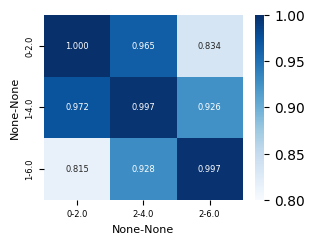

In [9]:
fig, axes = cp.plot(height = 0.5, width = 0.5)
sns.heatmap(corr_df, cmap = "Blues", vmin = 0.8, vmax = 1, annot=True, annot_kws={"size": 6}, fmt = ".3f", ax=axes[0])
plt.savefig("larry.figure_s2a.svg")
plt.savefig("larry.figure_s2a.png")